In [2]:
# Célula 1: Carregando as Bibliotecas e os Dados Processados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregando o nosso dataset limpo e unificado
path_dados = '../data/processed/censo_cnpq_unificado_2023.csv'
df = pd.read_csv(path_dados)

print("Dataset unificado carregado com sucesso!")
print("Formato do DataFrame:", df.shape)
df.head()

Dataset unificado carregado com sucesso!
Formato do DataFrame: (2580, 44)


,CO_IES,NO_IES,SG_IES,NO_MUNICIPIO_IES,SG_UF_IES,TP_CATEGORIA_ADMINISTRATIVA,QT_DOC_EX_DOUT,QT_DOC_EX_MEST,nome_ies_padronizado,total_bolsas_cnpq,...,PCI - Programa de Capacitação Institucional,PDE - Pós-doutorado no Exterior,PDI - Pos-doutorado Empresarial,PDJ - Pós-doutorado Júnior,PDS - Pós-doutorado Sênior,PQ - Produtividade em Pesquisa,PV - Pesquisador Visitante,SET - Fixação de Recursos Humanos,SWE - Doutorado Sanduíche no Exterior,SWP - Doutorado-Sanduiche no Pais
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Cuiabá,MT,1,1263,191,universidade federal de mato grosso,534,...,0,0,0,4,0,67,0,0,0,0
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,Brasília,DF,1,2550,224,universidade de brasilia,1684,...,0,0,0,20,10,405,0,0,0,0
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,São Cristóvão,SE,1,1456,210,universidade federal de sergipe,534,...,0,0,0,5,1,84,0,0,0,1
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Manaus,AM,1,1217,537,universidade federal do amazonas,404,...,0,0,0,4,0,54,0,0,0,0
4,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Teresina,PI,1,1142,250,universidade federal do piaui,496,...,0,0,0,2,1,72,0,9,0,0


--- Resumo Estatístico ---
       QT_DOC_EX_DOUT  QT_DOC_EX_MEST  total_bolsas_cnpq
count     2580.000000     2580.000000        2580.000000
mean        74.562791       47.531783          26.038372
std        286.187938       91.583342         195.604690
min          0.000000        0.000000           0.000000
25%          3.000000        6.000000           0.000000
50%         10.000000       17.000000           0.000000
75%         34.000000       46.000000           0.000000
max       5546.000000     1779.000000        3950.000000

--- Matriz de Correlação ---
                   QT_DOC_EX_DOUT  QT_DOC_EX_MEST  total_bolsas_cnpq
QT_DOC_EX_DOUT           1.000000        0.505328           0.900328
QT_DOC_EX_MEST           0.505328        1.000000           0.258628
total_bolsas_cnpq        0.900328        0.258628           1.000000


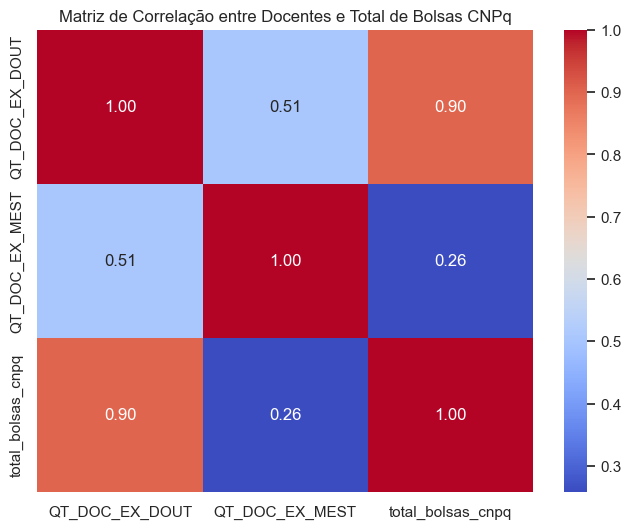

In [3]:
# Célula 2: Análise Descritiva Inicial
# Começar com um resumo estatístico das colunas mais importantes.
print("--- Resumo Estatístico ---")
# Selecionando colunas numéricas de interesse para o describe
colunas_analise = ['QT_DOC_EX_DOUT', 'QT_DOC_EX_MEST', 'total_bolsas_cnpq']
print(df[colunas_analise].describe())

# Ver a correlação entre essas variáveis
print("\n--- Matriz de Correlação ---")
correlation_matrix = df[colunas_analise].corr()
print(correlation_matrix)

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Docentes e Total de Bolsas CNPq')
plt.show()

Quais instituições recebem mais bolsas do CNPq?
Vamos criar um ranking para identificar as IES que são polos de pesquisa, de acordo com os dados.

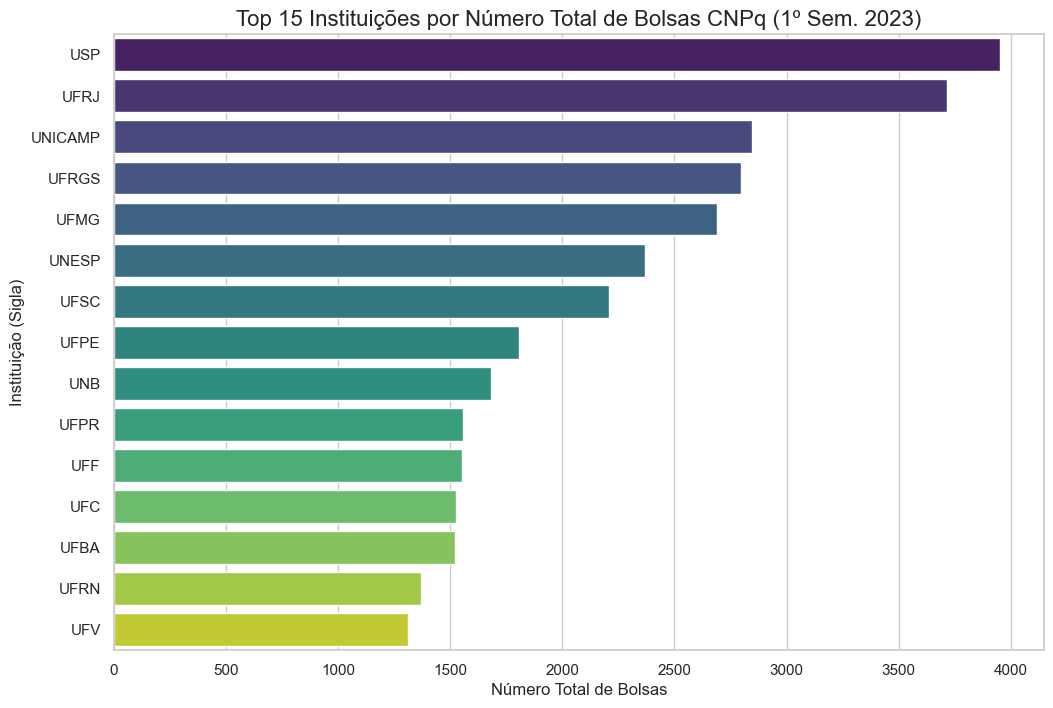

In [4]:
# Célula 3: Top 15 Instituições por Total de Bolsas

# Ordenando o DataFrame pelo total de bolsas em ordem decrescente
df_top15_bolsas = df.sort_values(by='total_bolsas_cnpq', ascending=False).head(15)

# Criando o gráfico de barras com a sintaxe atualizada
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total_bolsas_cnpq',
    y='SG_IES',
    data=df_top15_bolsas,
    palette='viridis',
    hue='SG_IES',       #<-- Usando a variável 'y' para o 'hue'
    legend=False        #<-- Desligando a legenda
)

plt.title('Top 15 Instituições por Número Total de Bolsas CNPq (1º Sem. 2023)', fontsize=16)
plt.xlabel('Número Total de Bolsas', fontsize=12)
plt.ylabel('Instituição (Sigla)', fontsize=12)
plt.show()

Como as bolsas se distribuem por categoria administrativa (Pública vs. Privada)?
Queremos saber se as bolsas se concentram em instituições públicas (federais, estaduais) ou se as privadas também têm uma participação relevante.

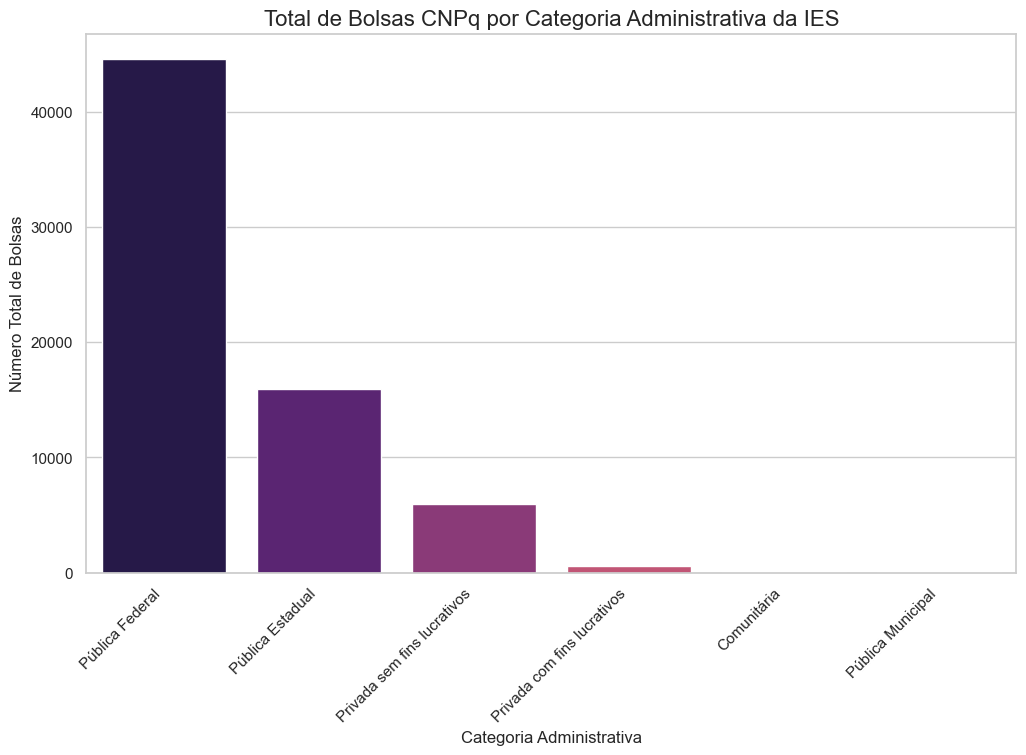

In [6]:
# Célula 4: Distribuição de Bolsas por Categoria Administrativa

# Mapeamento e agrupamento (código continua o mesmo)
mapa_categoria = {1: 'Pública Federal', 2: 'Pública Estadual', 3: 'Pública Municipal', 4: 'Privada com fins lucrativos', 5: 'Privada sem fins lucrativos', 6: 'Especial', 7: 'Comunitária'}
df['NO_CATEGORIA'] = df['TP_CATEGORIA_ADMINISTRATIVA'].map(mapa_categoria)
bolsas_por_categoria = df.groupby('NO_CATEGORIA')['total_bolsas_cnpq'].sum().sort_values(ascending=False)

# Criando o gráfico com a sintaxe atualizada
plt.figure(figsize=(12, 7))
sns.barplot(
    x=bolsas_por_categoria.index,
    y=bolsas_por_categoria.values,
    palette='magma',
    hue=bolsas_por_categoria.index, #<-- Usando a variável 'x' para o 'hue'
    legend=False                    #<-- Desligando a legenda
)

plt.title('Total de Bolsas CNPq por Categoria Administrativa da IES', fontsize=16)
plt.xlabel('Categoria Administrativa', fontsize=12)
plt.ylabel('Número Total de Bolsas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: Espera-se que as instituições públicas, especialmente as federais e estaduais, concentrem a grande maioria das bolsas de pesquisa, o que este gráfico deve confirmar visualmente.

3 - Qual a distribuição geográfica das bolsas entre os estados?
Vamos ver em quais estados a pesquisa é mais fomentada, de acordo com a distribuição de bolsas.

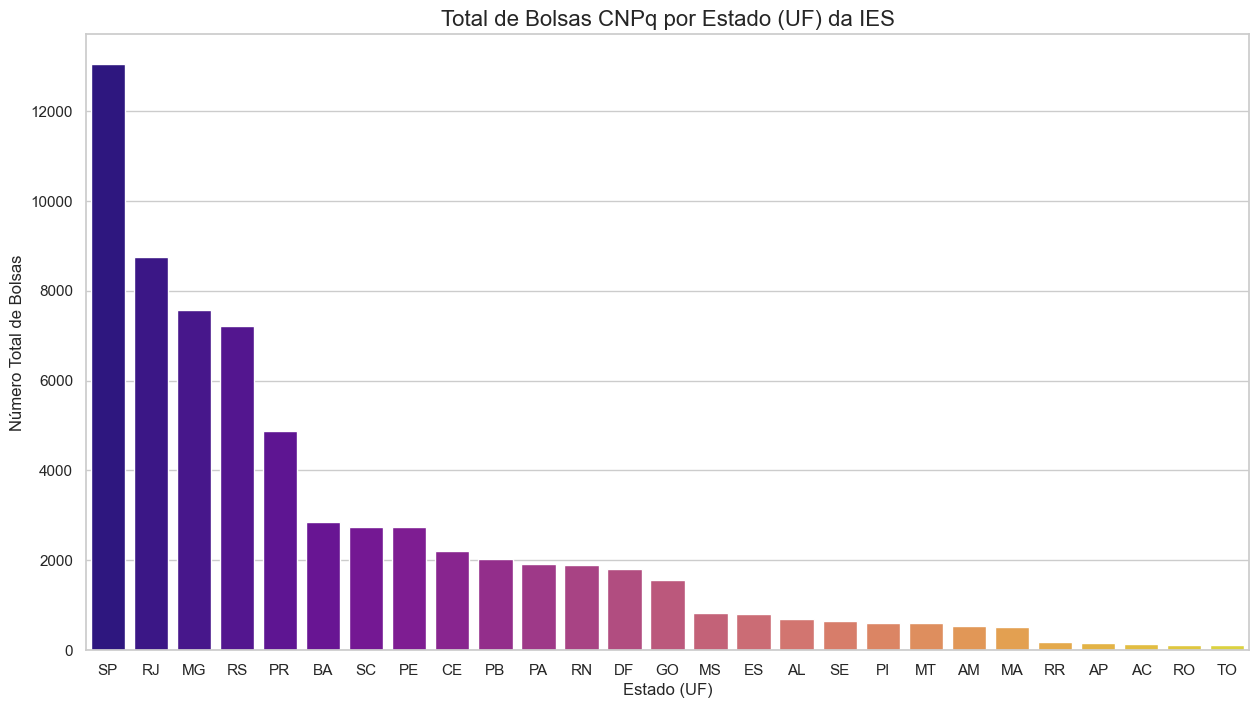

In [7]:
# Célula 5: Distribuição de Bolsas por Estado (UF) (versão corrigida)

# Agrupamento (código continua o mesmo)
bolsas_por_uf = df.groupby('SG_UF_IES')['total_bolsas_cnpq'].sum().sort_values(ascending=False)

# Criando o gráfico com a sintaxe atualizada
plt.figure(figsize=(15, 8))
sns.barplot(
    x=bolsas_por_uf.index,
    y=bolsas_por_uf.values,
    palette='plasma',
    hue=bolsas_por_uf.index, #<-- Usando a variável 'x' para o 'hue'
    legend=False             #<-- Desligando a legenda
)

plt.title('Total de Bolsas CNPq por Estado (UF) da IES', fontsize=16)
plt.xlabel('Estado (UF)', fontsize=12)
plt.ylabel('Número Total de Bolsas', fontsize=12)
plt.show()

Insight: Este gráfico provavelmente mostrará uma forte concentração de bolsas nos estados da região Sudeste (São Paulo, Rio de Janeiro, Minas Gerais) e Sul.

4 -  Qual a relação visual entre o número de Doutores e as bolsas?
Vimos que a correlação é forte. Um gráfico de dispersão (scatterplot) nos ajudará a visualizar essa relação e identificar possíveis outliers.

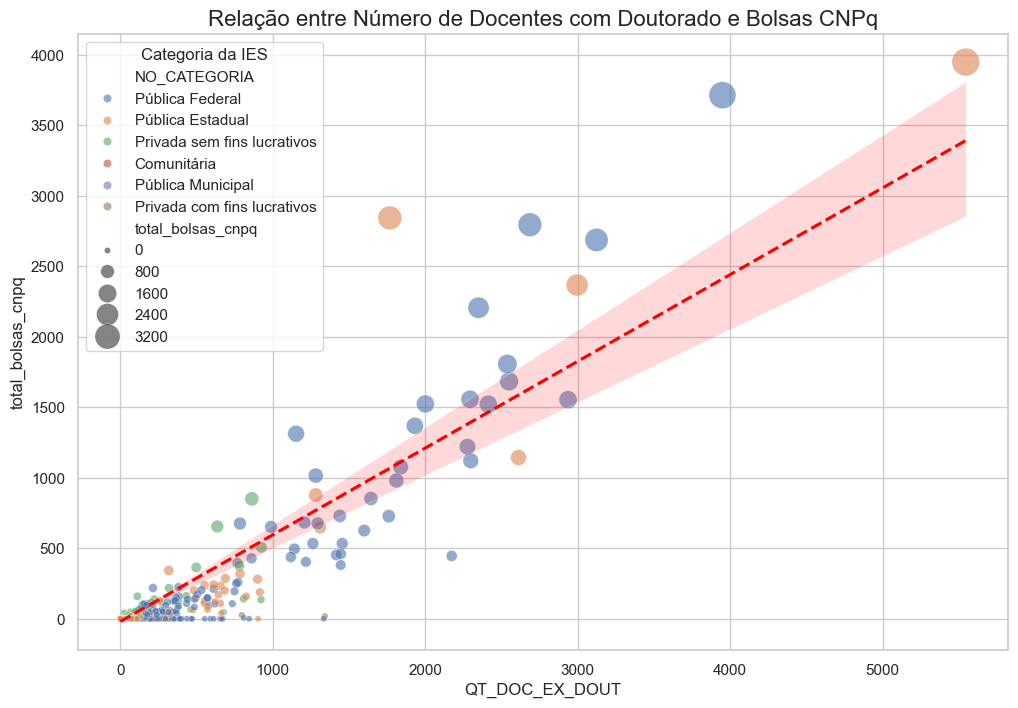

In [8]:
# Célula 6: Relação entre Doutores e Bolsas (Gráfico de Dispersão)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='QT_DOC_EX_DOUT',
    y='total_bolsas_cnpq',
    hue='NO_CATEGORIA', # Colore os pontos pela categoria da IES
    alpha=0.6, # Deixa os pontos um pouco transparentes
    size='total_bolsas_cnpq', # O tamanho do ponto também representa o total de bolsas
    sizes=(20, 400)
)

plt.title('Relação entre Número de Docentes com Doutorado e Bolsas CNPq', fontsize=16)
plt.xlabel('Quantidade de Docentes com Doutorado', fontsize=12)
plt.ylabel('Número Total de Bolsas CNPq', fontsize=12)
plt.legend(title='Categoria da IES')

# Adicionando uma linha de regressão para visualizar a tendência geral
sns.regplot(
    data=df,
    x='QT_DOC_EX_DOUT',
    y='total_bolsas_cnpq',
    scatter=False, # Não plota os pontos novamente
    color='red',
    line_kws={'linestyle':'--'}
)

plt.show()

Insight: Este gráfico deve mostrar uma clara tendência positiva: quanto mais doutores uma instituição tem, mais bolsas ela tende a receber. Também poderemos identificar visualmente as instituições que são pontos fora da curva.

Após executar essas células, terá um excelente panorama da distribuição da pesquisa no Brasil com base nos dados que foi processado.